In [33]:
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [4]:
mydata = pd.read_csv("ethereum_price.csv")

In [5]:
mydata

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",298.570000,304.840000,290.770000,294.660000,"5407,66,000","28,533,300,000"
1,"Nov 06, 2017",296.430000,305.420000,293.720000,298.890000,"5793,59,000","28,322,700,000"
2,"Nov 05, 2017",300.040000,301.370000,295.120000,296.260000,"3376,58,000","28,661,500,000"
3,"Nov 04, 2017",305.480000,305.480000,295.800000,300.470000,"4164,79,000","29,175,300,000"
4,"Nov 03, 2017",288.500000,308.310000,287.690000,305.710000,"6463,40,000","27,547,400,000"
5,"Nov 02, 2017",290.730000,293.910000,281.170000,287.430000,"9049,01,000","27,754,200,000"
6,"Nov 01, 2017",305.760000,306.400000,290.580000,291.690000,"5538,64,000","29,183,600,000"
7,"Oct 31, 2017",307.380000,310.550000,305.880000,305.880000,"3695,83,000","29,331,500,000"
8,"Oct 30, 2017",304.780000,310.500000,304.350000,307.750000,"3314,42,000","29,077,600,000"
9,"Oct 29, 2017",296.380000,313.750000,296.380000,305.090000,"5517,52,000","28,270,200,000"


In [6]:
mydata.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [7]:
mydata.Open

0      298.570000
1      296.430000
2      300.040000
3      305.480000
4      288.500000
5      290.730000
6      305.760000
7      307.380000
8      304.780000
9      296.380000
10     297.920000
11     296.510000
12     298.020000
13     298.440000
14     287.120000
15     295.100000
16     300.550000
17     303.570000
18     308.050000
19     314.540000
20     316.940000
21     333.480000
22     336.710000
23     339.530000
24     338.850000
25     304.080000
26     303.500000
27     301.180000
28     297.600000
29     308.670000
          ...    
794      1.280000
795      1.260000
796      1.300000
797      1.350000
798      1.350000
799      1.320000
800      1.180000
801      1.190000
802      1.150000
803      1.170000
804      1.130000
805      1.230000
806      1.350000
807      1.380000
808      1.400000
809      1.480000
810      1.250000
811      1.170000
812      1.220000
813      1.580000
814      1.680000
815      1.800000
816      1.810000
817      1.220000
818      1

In [8]:
# extraxt the values from pandas series, this will return a numpy array
x , y = mydata.Open.values, mydata.Close.values

In [9]:
# Now its an array
x

array([298.57    , 296.43    , 300.04    , 305.48    , 288.5     ,
       290.73    , 305.76    , 307.38    , 304.78    , 296.38    ,
       297.92    , 296.51    , 298.02    , 298.44    , 287.12    ,
       295.1     , 300.55    , 303.57    , 308.05    , 314.54    ,
       316.94    , 333.48    , 336.71    , 339.53    , 338.85    ,
       304.08    , 303.5     , 301.18    , 297.6     , 308.67    ,
       311.06    , 308.89    , 295.15    , 292.77    , 292.75    ,
       297.48    , 302.48    , 301.55    , 291.48    , 299.12    ,
       306.47    , 287.02    , 292.35    , 282.22    , 286.21    ,
       264.6     , 258.11    , 283.26    , 282.01    , 293.66    ,
       252.23    , 245.85    , 250.87    , 215.22    , 276.59    ,
       291.12    , 294.63    , 289.75    , 294.06    , 296.17    ,
       329.64    , 333.52    , 313.8     , 297.57    , 347.13    ,
       350.23    , 387.82    , 383.47    , 378.44    , 369.47    ,
       347.96    , 350.04    , 334.36    , 331.99    , 326.11 

In [10]:
# Now its an array
y

array([294.66    , 298.89    , 296.26    , 300.47    , 305.71    ,
       287.43    , 291.69    , 305.88    , 307.75    , 305.09    ,
       296.3     , 297.42    , 296.53    , 297.93    , 298.33    ,
       286.95    , 295.45    , 300.19    , 304.01    , 308.09    ,
       314.32    , 317.08    , 333.38    , 336.6     , 339.63    ,
       338.76    , 304.14    , 303.46    , 299.87    , 297.39    ,
       308.61    , 311.12    , 308.59    , 295.86    , 292.66    ,
       292.46    , 297.48    , 302.34    , 301.46    , 291.47    ,
       299.15    , 306.47    , 287.44    , 292.33    , 282.48    ,
       286.17    , 264.31    , 258.58    , 283.74    , 282.8     ,
       293.5     , 251.75    , 246.52    , 250.46    , 213.91    ,
       277.11    , 291.46    , 294.53    , 288.75    , 294.4     ,
       296.5     , 329.43    , 334.34    , 312.99    , 295.17    ,
       347.48    , 348.98    , 387.74    , 383.04    , 378.49    ,
       370.67    , 347.75    , 347.89    , 333.88    , 331.92 

In [11]:
# DOnt do this, Value of x will be the shape then , it wont be something you want to train
# x = x.shape

In [12]:
# x = np.array(x)
# x
x = x.reshape(-1,1)

Text(0, 0.5, 'closing price')

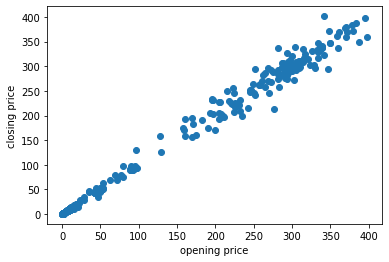

In [13]:
plt.scatter(x,y)
plt.xlabel("opening price")
plt.ylabel("closing price")

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [34]:
reg = Lasso(alpha = 0.2)

In [35]:
reg.fit(x_train, y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
prediction = reg.predict(x_test)

In [37]:
prediction

array([ 12.02976864,  11.25923182,   8.7975168 ,  10.41864621,
         1.23841655, 252.73746422, 295.03693329,  44.2822382 ,
        19.71512285,  13.51080044,  10.63879958, 190.31397519,
         2.90341051,  11.94971286, 287.55171851, 347.70362498,
         1.38235082,  10.45867409,   8.20710548,  12.45006145,
        11.76958738,  18.84451632, 339.41785247,   9.57806059,
        14.15124662,  10.43866015, 398.19880382,   1.20539855,
        12.78029151,  11.03907845,   8.97764229,   1.15664758,
         1.31206686,  11.71955252,  13.19057735,  11.96972681,
         1.27357104, 361.76342012, 235.43541027,  11.55944097,
        62.60500325,   8.727468  , 307.92591275,  44.64248918,
         2.4831177 ,  14.64158823,   1.19165097,   1.68255997,
         1.31780686, 251.37651607, 292.88543439, 275.64342228,
       296.91824396,   1.03824709,  10.16847191,  89.82396609,
         1.69256694,   1.32535412, 205.16432109,   1.23771906,
         1.3923578 ,   1.68255997,  10.57875775, 305.32

In [38]:
y_test

array([ 11.78    ,  10.98    ,   7.76    ,   9.72    ,   0.928962,
       293.5     , 308.86    ,  44.64    ,  21.47    ,  12.82    ,
        10.23    , 174.45    ,   2.54    ,  11.95    , 306.47    ,
       295.17    ,   0.916627,  11.39    ,   7.64    ,  11.76    ,
        11.52    ,  19.3     , 339.63    ,  10.41    ,  13.88    ,
         9.97    , 359.05    ,   0.82121 ,  13.19    ,  10.07    ,
         7.44    ,   0.792167,   0.968018,  11.53    ,  12.67    ,
        11.62    ,   0.791829, 370.23    , 199.7     ,  11.08    ,
        70.16    ,   8.24    , 305.88    ,  43.27    ,   2.5     ,
        12.75    ,   0.863262,   1.29    ,   0.986833, 246.52    ,
       287.44    , 287.99    , 305.09    ,   0.701897,   9.9     ,
        88.66    ,   1.53    ,   0.940701, 226.77    ,   0.888812,
         0.989789,   1.35    ,  10.4     , 307.75    ,   2.21    ,
         0.919047,   1.38    ,  11.19    ,  12.18    ,   0.873054,
         1.06    ,   7.17    ,   0.878614,   0.858077,  12.59 

In [39]:
r2_score(y_test,prediction)

0.9949607247583997

In [40]:
reg.score(x_train,y_train)

0.9948013140390608

In [41]:
reg.score(x_test,y_test)

0.9949607247583997